In [3]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.
test_images = test_images / 255.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

model = Sequential(layers=[
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10),
    Softmax()])

In [34]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer='adam', 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6758 - accuracy: 0.7949
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6200 - accuracy: 0.8440
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6100 - accuracy: 0.8533
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6026 - accuracy: 0.8597
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5966 - accuracy: 0.8652
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5936 - accuracy: 0.8684
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5891 - accuracy: 0.8728
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5859 - accuracy: 0.8761
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5832 - accuracy: 0.8783
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.580

In [36]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 1.5926 - accuracy: 0.8690 - 298ms/epoch - 951us/step


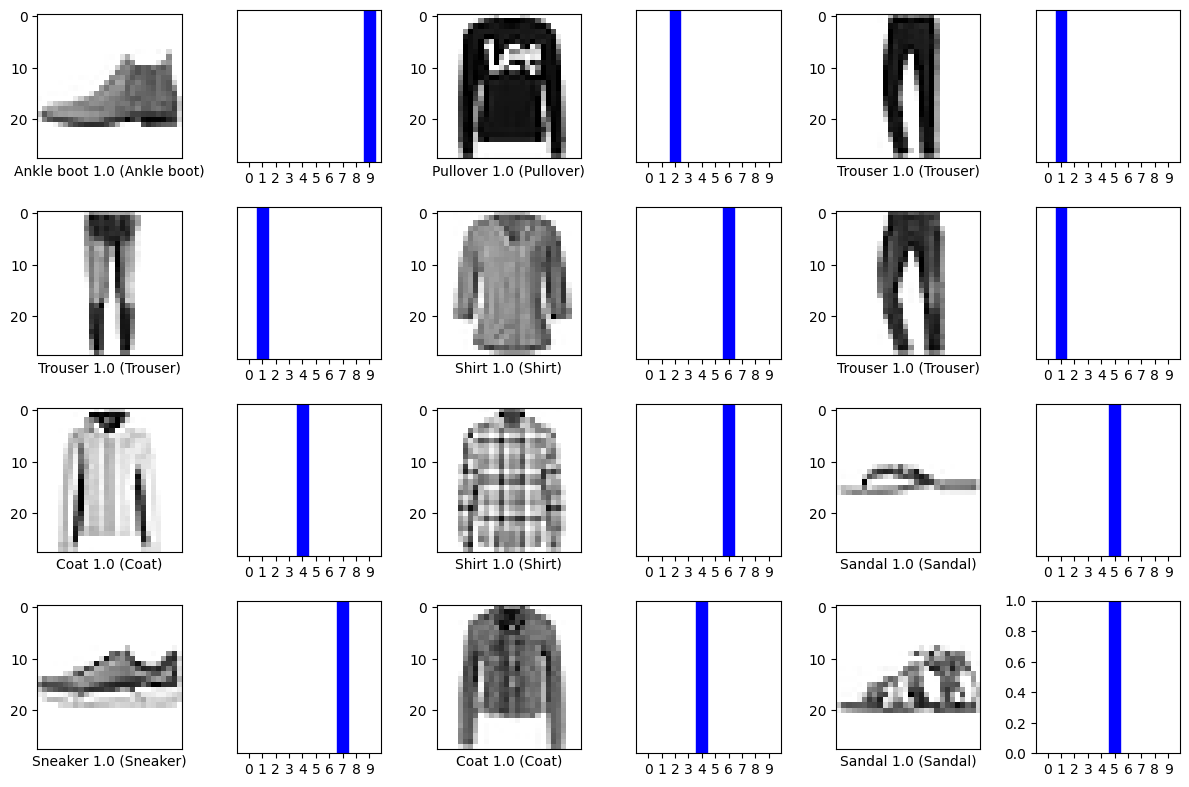

In [44]:
predictions = model.predict(test_images[:12])
plt.figure(figsize=(2 * 3 * 2, 2 * 4))
for i in range(12):
    plt.grid(False)
    plt.yticks([])
    # image
    plt.subplot(4, 3 * 2, i * 2 + 1)
    plt.xticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted = np.argmax(predictions[i])
    confidence = round(np.max(predictions[i]), 2)
    plt.xlabel(f'{class_names[predicted]} {confidence} ({class_names[test_labels[i]]})')
    # confidence distribution
    plt.subplot(4, 3 * 2, i * 2 + 2)
    plt.xticks(range(10))
    plots = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plots[np.argmax(predictions[i])].set_color('red')
    plots[test_labels[i]].set_color('blue')
plt.tight_layout()
plt.show()